# K Nearest Neighbors

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1999, 71) (1999,)
(857, 71) (857,)


In [5]:
# Standard scaler is used to scale all the features to have equal weightage

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

> folds = 2, accuracy = 0.730 with std = 0.007
> folds = 3, accuracy = 0.761 with std = 0.024
> folds = 4, accuracy = 0.762 with std = 0.017
> folds = 5, accuracy = 0.766 with std = 0.025
> folds = 6, accuracy = 0.778 with std = 0.026
> folds = 7, accuracy = 0.774 with std = 0.022
> folds = 8, accuracy = 0.779 with std = 0.030
> folds = 9, accuracy = 0.778 with std = 0.024
> folds = 10, accuracy = 0.782 with std = 0.027


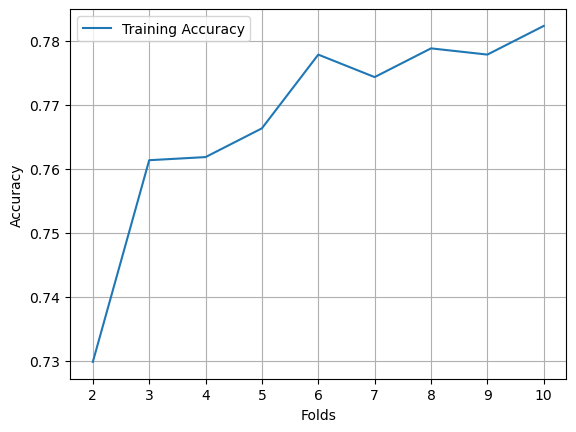

In [6]:
# k-fold cross validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

ax = list(range(2, 11))
ay = []

# finding the best K value for K-fold cross validation
for n in ax:
    cv = KFold(n_splits = n)
    scores = cross_val_score(KNeighborsClassifier(), x_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
    ay.append(mean(scores))
    print('> folds = %d, accuracy = %.3f with std = %.3f' % (n, mean(scores), std(scores)))
    
plt.plot(ax, ay, label = 'Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.xticks(ax)
plt.legend()
plt.grid()

In [7]:
# using grid search to find the optimal hyperparameters

gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                "p": [1,2]},
                  cv = 5, scoring = "accuracy")

gs.fit(x_train, y_train)

gs.best_score_, gs.best_params_

(0.8549248120300751, {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1})

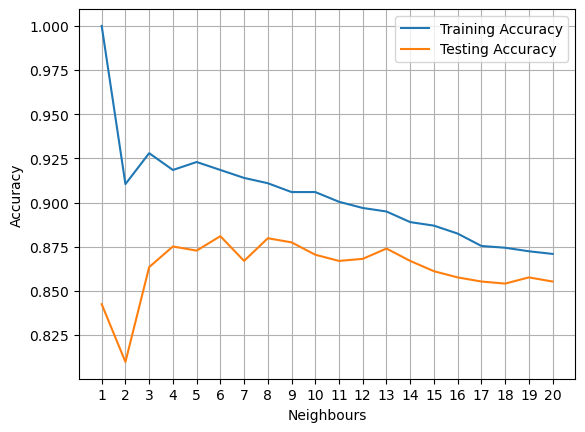

In [8]:
# plotting the accuracies for different values of K in KNN

training_accuracy = []
test_accuracy = []
neighbours = range(1, 21)

for k in neighbours: 
    KNN = KNeighborsClassifier(n_neighbors = k, p = 1, algorithm = 'auto')
    KNN.fit(x_train, y_train)
    training_accuracy.append(KNN.score(x_train, y_train))
    test_accuracy.append(KNN.score(x_test, y_test))
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)

# Plotting Train & Test accuracies vs K Value

plt.plot(neighbours, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbours, test_accuracy, label = 'Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Neighbours')
plt.xticks(neighbours)
plt.legend()
plt.grid()

In [9]:
# train & test accuracies 

y_pred_train = gs.predict(x_train)
y_pred_test = gs.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.9059529764882441
score on test data:  0.8774795799299884


## Confusion Matrix & Classification Report

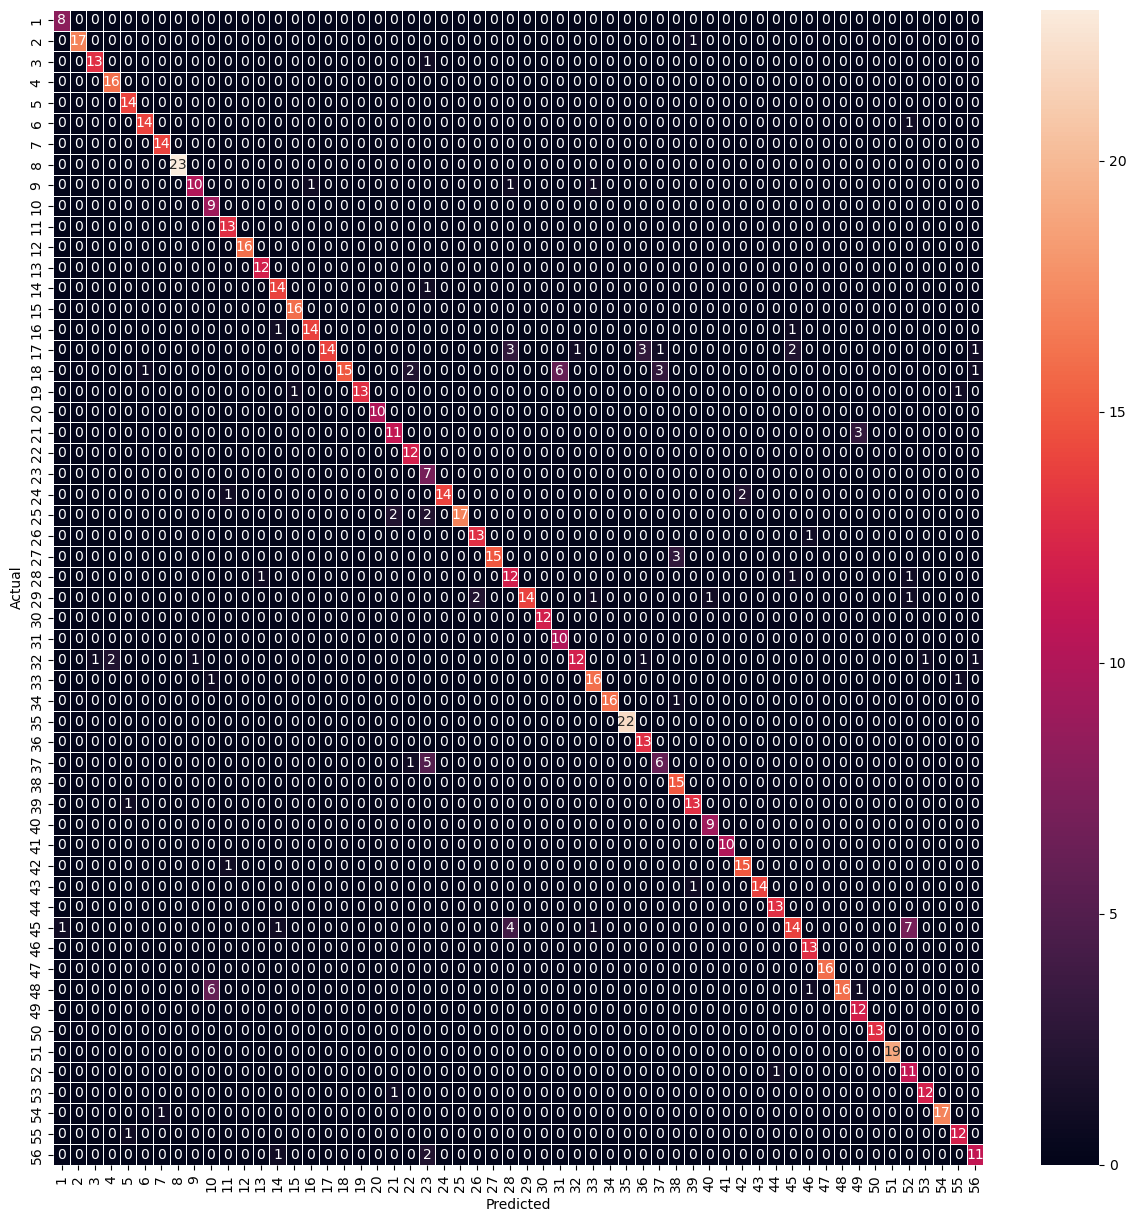

In [10]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [11]:
# Classification report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       1.00      0.89      0.94         9
         2.0       0.94      1.00      0.97        17
         3.0       0.93      0.93      0.93        14
         4.0       1.00      0.89      0.94        18
         5.0       1.00      0.88      0.93        16
         6.0       0.93      0.93      0.93        15
         7.0       1.00      0.93      0.97        15
         8.0       1.00      1.00      1.00        23
         9.0       0.77      0.91      0.83        11
        10.0       1.00      0.56      0.72        16
        11.0       1.00      0.87      0.93        15
        12.0       1.00      1.00      1.00        16
        13.0       1.00      0.92      0.96        13
        14.0       0.93      0.82      0.87        17
        15.0       1.00      0.94      0.97        17
        16.0       0.88      0.93      0.90        15
        17.0       0.56      1.00      0.72        14
        18.0       0.54    